In [95]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
house_data = pd.read_csv('house_data.csv')
#print(house_data)
house_data = house_data.dropna(how = 'any')
lee = len(house_data['surface'].values)
#print(house_data.loc[:, 'surface':'arrondissement'])
xtrain, xtest, ytrain, ytest = train_test_split(house_data.loc[:, 'surface':'arrondissement'].values, house_data['price'].values, train_size=0.8)

<IPython.core.display.Javascript object>


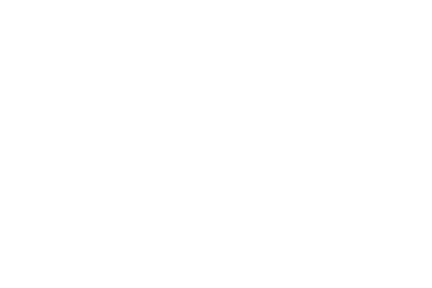

0.05454545454545454


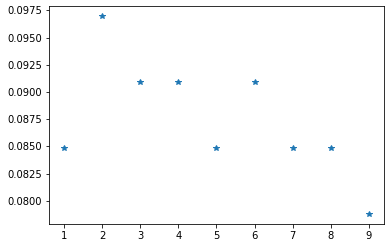

In [97]:
pre = []
for i in range(1, 10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pre.append(knn.score(xtest, ytest))
plt.plot([j for j in range(1,10)],pre,'*')
print(min(err))
#on remarque une plus grande erreur dans la prediction pour  les valeurs autres que 3.

In [98]:
#autre methode, la regression lineaire en deux dimension
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)
print(regr.score(xtest, ytest))
print(regr.coef_)
print(regr.intercept_)

0.8629707147611924
[ 37.27174537 -44.16485643]
27.48339164364029


<IPython.core.display.Javascript object>


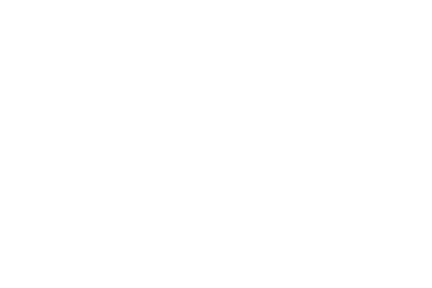

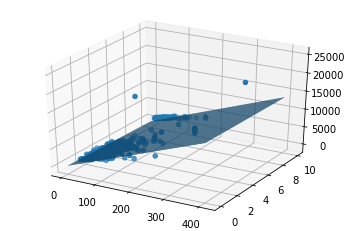

In [99]:
#pour se rassuerer de la concordance de nos resultas nous allons afficher le graphque 3d associe
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 400, 100)
y = np.linspace(0, 10, 100)
xv, yv = np.meshgrid(x, y)
Z = regr.score(xtest, ytest)
z = 34.9949672*xv -56.48580162*yv
ax.plot_surface(xv, yv, z);
#print(xtrain)
ax.scatter(xtrain[:,0],xtrain[:,1], ytrain)
plt.show()

In [ ]:
#en conclusion, la meilleur facon de traiter le problemme est avec une regression liniaire en deux dimmenssion